## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
study_results.head()
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_group = combined_df.groupby(["Drug Regimen"])
tumor_mean = tumor_group.mean()["Tumor Volume (mm3)"]
tumor_median = tumor_group.median()["Tumor Volume (mm3)"]
tumor_variance = tumor_group.var()["Tumor Volume (mm3)"]
tumor_standard = tumor_group.std()["Tumor Volume (mm3)"]
tumor_sem = tumor_group.sem()["Tumor Volume (mm3)"]

tumor_stats = {"Tumor Volume Mean":tumor_mean, 
               "Tumor Volume Median":tumor_median, 
               "Tumor Volume Variance":tumor_variance, 
               "Tumor Volume Standard Deviation":tumor_standard,
               "Tumor Volume SEM":tumor_sem}

tumor_df = pd.DataFrame(tumor_stats)
tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

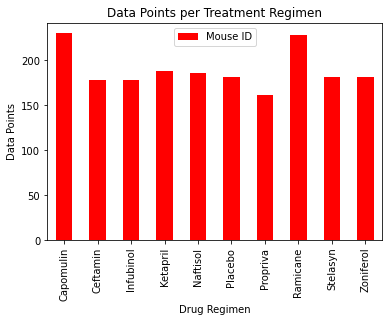

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_group = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drug = drug_group[["Drug Regimen", "Mouse ID"]]
drug = drug.set_index("Drug Regimen")

drug.plot(kind="bar", color="r", title="Data Points per Treatment Regimen")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout()

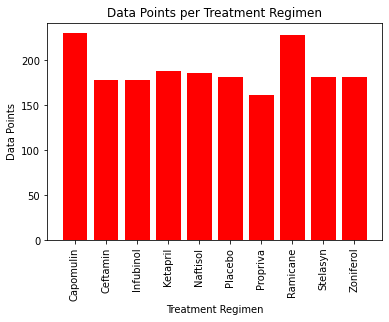

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_group = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
plt.bar(treatment_group["Drug Regimen"], treatment_group["Mouse ID"], color="r")
plt.xticks(rotation="vertical")

plt.title("Data Points per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout()

## Pie plots

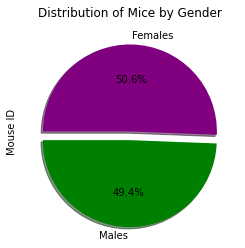

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = (combined_df.groupby(["Sex"])["Mouse ID"].count())
labels = ["Males", "Females"]
colors = ["green", "purple"]
explode = (0.1, 0)

gender_pie = gender_group.plot(kind="pie", startangle=180, labels=labels, 
             explode=explode, autopct="%1.1f%%", shadow=True, colors=colors, 
             title= "Distribution of Mice by Gender")
gender_pie

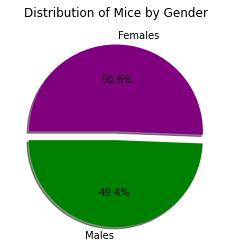

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = (combined_df.groupby(["Sex"])["Mouse ID"].count())
labels = ["Males", "Females"]
colors = ["green", "purple"]
explode = (0.1, 0)

plt.pie(gender_group, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Distribution of Mice by Gender")

plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
treatment = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment = treatment.sort_values(["Timepoint"], ascending=True)
treatment_df = treatment[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_df
tumors = treatment_df["Tumor Volume (mm3)"]
tumors

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume is: 40.2201707875
The upper quartile of Tumor Volume is: 50.356470630000004
The interquartile range of Tumor Volume is: 10.136299842500001
The the median of Tumor Volume is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


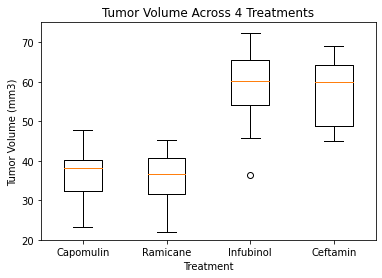

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_sorted = treatment_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
treatment_frame = treatment_sorted.to_frame()
treatment_frame

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor = treatment_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_df = pd.DataFrame(tumor)
tumor_df = tumor_df.reindex(regimens)
tumor_size = [x for x in tumor_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_size, labels=regimens)
plt.ylim(20, 75)
plt.title("Tumor Volume Across 4 Treatments")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and scatter plots

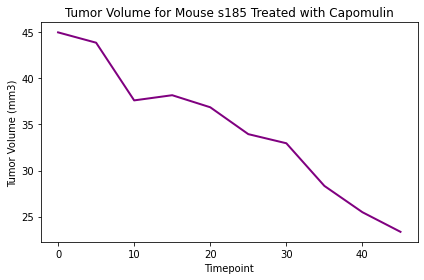

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin.head()

mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
mouse

x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color = "purple", linewidth = 2)
plt.title("Tumor Volume for Mouse s185 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()


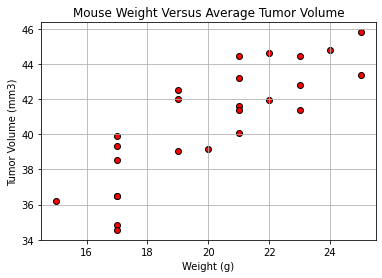

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_df
cap_mean = pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
cap_mean

x_values = cap_mean["Weight (g)"]
y_values = cap_mean["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

In [12]:
# Calculate the correlation coefficient... 
mouse_weight = cap_mean.iloc[:,1]
avg_volume = cap_mean.iloc[:,2]
correlation = st.pearsonr(mouse_weight,avg_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


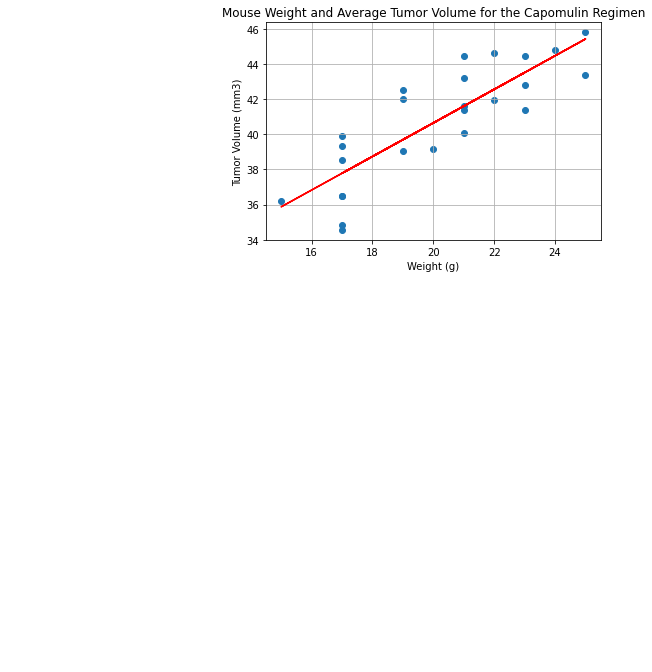

In [13]:
#...and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight,avg_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight and Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()